In [1]:
import pandas as pd
import plotly.express as px

**Carga de archivo**

Enlace al dataset: [spotify.csv](https://www.kaggle.com/datasets/alexisbcook/data-for-datavis?select=spotify.csv)


El dataset utilizado corresponde a un registro histórico de reproducciones diarias de varias canciones populares en la plataforma Spotify. Este conjunto de datos está organizado en formato de series de tiempo, donde cada fila representa un día específico y cada columna contiene el número de streams correspondientes a una canción determinada.

In [5]:
#Cargar dataset de Spotify
df = pd.read_csv('/content/spotify.csv')

#Vista rápida de columnas
print(df.columns)

Index(['Date', 'Shape of You', 'Despacito', 'Something Just Like This',
       'HUMBLE.', 'Unforgettable'],
      dtype='object')


In [3]:
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


**Paleta de colores**

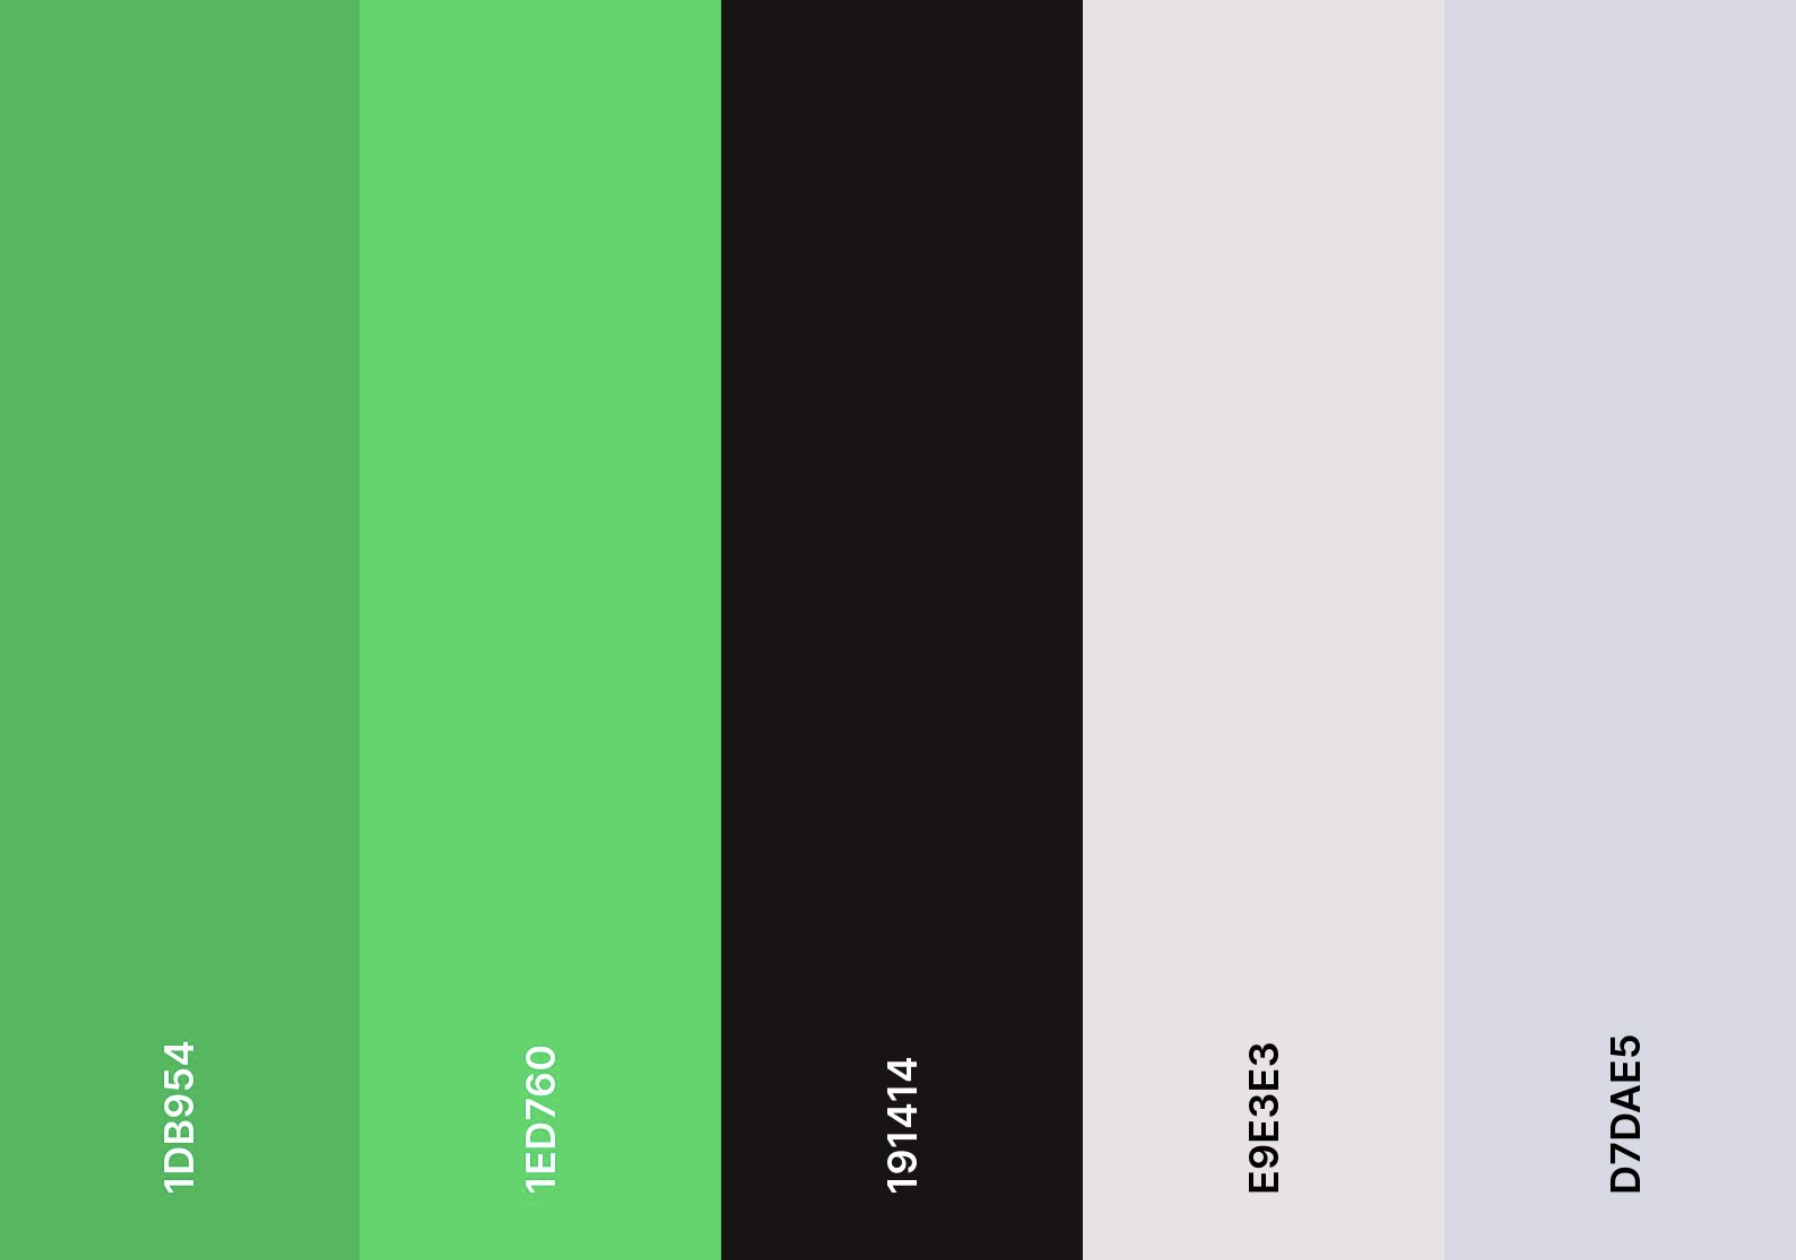

In [4]:
# Paleta de colores Spotify
spotify_palette = ["#1DB954", "#1ED760", "#191414", "#E9E3E3", "#D7DAE5"]

**Gráficas**

In [7]:
#Top 10 canciones más populares

song_streams = df.drop(columns="Date").sum().reset_index()
song_streams.columns = ["song_name", "total_streams"]
top10 = song_streams.sort_values("total_streams", ascending=False).head(10)

fig1 = px.bar(
    top10,
    x="song_name",
    y="total_streams",
    color="song_name",
    color_discrete_sequence=spotify_palette,
    title="Top 10 Canciones Más Populares (Total Streams)",
    labels={"song_name": "Canción", "total_streams": "Streams Totales"},
)

fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

In [8]:
#Relación Shape of You vs Despacito

fig2 = px.scatter(
    df,
    x="Shape of You",
    y="Despacito",
    color="Shape of You",
    color_continuous_scale=spotify_palette,
    title="Relación entre Streams: Shape of You vs Despacito",
    labels={"Shape of You": "Shape of You (streams)", "Despacito": "Despacito (streams)"},
)

fig2.update_traces(marker=dict(size=10))
fig2.show()

In [9]:
#Serie de tiempo de todas las canciones

df_long = df.melt(id_vars="Date", var_name="Song", value_name="Streams")
df_long["Date"] = pd.to_datetime(df_long["Date"])

fig3 = px.line(
    df_long,
    x="Date",
    y="Streams",
    color="Song",
    color_discrete_sequence=spotify_palette,
    title="Evolución Diaria de Streams por Canción",
)

fig3.update_layout(hovermode="x unified")
fig3.show()

In [10]:
#Área apilada
fig4 = px.area(
    df_long,
    x="Date",
    y="Streams",
    color="Song",
    color_discrete_sequence=spotify_palette,
    title="Contribución Diaria de Cada Canción al Total de Streams",
)

fig4.show()

In [11]:
#Línea de Streams “Shape of You”
shape_df = df_long[df_long["Song"] == "Shape of You"]

fig5 = px.line(
    shape_df,
    x="Date",
    y="Streams",
    title="Streams Diarios de 'Shape of You'",
)

fig5.update_traces(mode="lines+markers", marker=dict(color=spotify_palette[0]))
fig5.show()

In [12]:
#Línea de Streams “Despacito”
desp_df = df_long[df_long["Song"] == "Despacito"]

fig6 = px.line(
    desp_df,
    x="Date",
    y="Streams",
    title="Streams Diarios de 'Despacito'",
)

fig6.update_traces(mode="lines+markers", marker=dict(color=spotify_palette[1]))
fig6.show()

In [13]:
#Top 3 canciones
top3 = ["Shape of You", "Despacito", "Something Just Like This"]
df_top3 = df_long[df_long["Song"].isin(top3)]

fig7 = px.line(
    df_top3,
    x="Date",
    y="Streams",
    color="Song",
    color_discrete_sequence=spotify_palette[:3],
    title="Streams Diarios de las Top 3 Canciones",
)

fig7.update_traces(mode="lines+markers")
fig7.show()

In [14]:
#Heatmap de correlación entre canciones
import plotly.graph_objects as go

corr = df.drop(columns="Date").corr()

fig8 = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale="Greens"
    )
)

fig8.update_layout(title="Mapa de Correlación entre Canciones")
fig8.show()

In [15]:
#Histograma de Shape of You
fig9 = px.histogram(
    shape_df,
    x="Streams",
    nbins=40,
    color_discrete_sequence=[spotify_palette[0]],
    title="Distribución de Streams - Shape of You",
)

fig9.show()

In [16]:
#Boxplot de streams de las top 5 canciones
top5 = song_streams.sort_values("total_streams", ascending=False).head(5)["song_name"]
df_top5 = df_long[df_long["Song"].isin(top5)]

fig10 = px.box(
    df_top5,
    x="Song",
    y="Streams",
    color="Song",
    color_discrete_sequence=spotify_palette,
    title="Distribución de Streams para las 5 Canciones Más Populares"
)

fig10.show()